In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
from matplotlib_venn import venn2

In [3]:
from IPython.display import display, Markdown, HTML

In [4]:
sb.set(font_scale=2)
sb.set_style('white')

In [5]:
with ZipFile('../data/train.csv.zip') as z:
    with z.open('train.csv') as f:
        train_df = pd.read_csv(f)

In [6]:
with ZipFile('../data/test.csv.zip') as z:
    with z.open('test.csv') as f:
        test_df = pd.read_csv(f)

In [7]:
joint_df = pd.concat((train_df, test_df))

In [8]:
joint_df.head(10)

,activation_date,category_name,city,deal_probability,description,image,image_top_1,item_id,item_seq_number,param_1,param_2,param_3,parent_category_name,price,region,title,user_id,user_type
0,2017-03-28,Товары для детей и игрушки,Екатеринбург,0.12789,"Кокон для сна малыша,пользовались меньше месяц...",d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,b912c3c6a6ad,2,Постельные принадлежности,NaN,NaN,Личные вещи,400.0,Свердловская область,Кокоби(кокон для сна),e00f8ff2eaf9,Private
1,2017-03-26,Мебель и интерьер,Самара,0.00000,"Стойка для одежды, под вешалки. С бутика.",79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,2dac0150717d,19,Другое,NaN,NaN,Для дома и дачи,3000.0,Самарская область,Стойка для Одежды,39aeb48f0017,Private
2,2017-03-20,Аудио и видео,Ростов-на-Дону,0.43177,"В хорошем состоянии, домашний кинотеатр с blu ...",b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,ba83aefab5dc,9,"Видео, DVD и Blu-ray плееры",NaN,NaN,Бытовая электроника,4000.0,Ростовская область,Philips bluray,91e2f88dd6e3,Private
3,2017-03-25,Товары для детей и игрушки,Набережные Челны,0.80323,Продам кресло от0-25кг,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,02996f1dd2ea,286,Автомобильные кресла,NaN,NaN,Личные вещи,2200.0,Татарстан,Автокресло,bf5cccea572d,Company
4,2017-03-16,Автомобили,Волгоград,0.20797,Все вопросы по телефону.,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,7c90be56d2ab,3,С пробегом,ВАЗ (LADA),2110,Транспорт,40000.0,Волгоградская область,"ВАЗ 2110, 2003",ef50846afc0b,Private
5,2017-03-28,Товары для детей и игрушки,Чистополь,0.80323,В хорошем состоянии,eb6ad1231c59d3dc7e4020e724ffe8e4d302023ddcbb99...,796.0,51e0962387f7,9,Автомобильные кресла,NaN,NaN,Личные вещи,1300.0,Татарстан,Авто люлька,bbfad0b1ad0a,Private
6,2017-03-23,Ремонт и строительство,Нижний Новгород,0.00000,Электро водонагреватель накопительный на 100 л...,0330f6ac561f5db1fa8226dd5e7e127b5671d44d075a98...,2823.0,c4f260a2b48a,125,Сантехника и сауна,NaN,NaN,Для дома и дачи,11000.0,Нижегородская область,Водонагреватель 100 литров нержавейка плоский,08f469d2e6f7,Private
7,2017-03-25,"Одежда, обувь, аксессуары",Пермь,0.80323,Бойфренды в хорошем состоянии.,9bab29a519e81c14f4582024adfebd4f11a4ac71d323a6...,567.0,6b71309d6a8a,61,Женская одежда,Джинсы,26,Личные вещи,500.0,Пермский край,Бойфренды colins,fef86baa002c,Private
8,2017-03-17,"Одежда, обувь, аксессуары",Оренбург,0.00000,54 раз мер очень удобное,75ce06d1f939a31dfb2af8ac55f08fa998fa336d13ee05...,415.0,c5b969cb63a2,85,Женская одежда,Платья и юбки,> 50 (XXL),Личные вещи,500.0,Оренбургская область,Платье,055825270190,Private
9,2017-03-22,Детская одежда и обувь,Нижний Новгород,0.00000,По стельке 15.5см мерить приокский район. Цвет...,54fb8521135fda77a860bfd2fac6bf46867ab7c06796e3...,46.0,b1570962e68c,136,Для девочек,Обувь,25,Личные вещи,400.0,Нижегородская область,Полу ботиночки замш натур.Бамбини,f9e8f831d94c,Company


In [9]:
joint_df.columns

Index(['activation_date', 'category_name', 'city', 'deal_probability',
       'description', 'image', 'image_top_1', 'item_id', 'item_seq_number',
       'param_1', 'param_2', 'param_3', 'parent_category_name', 'price',
       'region', 'title', 'user_id', 'user_type'],
      dtype='object')

In [10]:
joint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011862 entries, 0 to 508437
Data columns (total 18 columns):
activation_date         object
category_name           object
city                    object
deal_probability        float64
description             object
image                   object
image_top_1             float64
item_id                 object
item_seq_number         int64
param_1                 object
param_2                 object
param_3                 object
parent_category_name    object
price                   float64
region                  object
title                   object
user_id                 object
user_type               object
dtypes: float64(3), int64(1), object(14)
memory usage: 291.6+ MB


## Variable exploration

### item_id

In [11]:
train_df['item_id'].describe()

count          1503424
unique         1503424
top       cc0e4bb3504f
freq                 1
Name: item_id, dtype: object

In [12]:
test_df['item_id'].describe()

count           508438
unique          508438
top       63ae699f52b8
freq                 1
Name: item_id, dtype: object

In [13]:
joint_df['item_id'].describe()

count          2011862
unique         2011862
top       da6ebee2f03c
freq                 1
Name: item_id, dtype: object

In [14]:
1503424 + 508438

2011862

Item ids do not intercept in train and test.

### user_id

In [15]:
train_df['user_id'].describe()

count          1503424
unique          771769
top       45ba3f23bf25
freq              1080
Name: user_id, dtype: object

In [16]:
test_df['user_id'].describe()

count           508438
unique          306069
top       abcdd1ca1a5c
freq               496
Name: user_id, dtype: object

In [17]:
joint_df['user_id'].describe()

count          2011862
unique         1009909
top       ee74bccca74f
freq              1414
Name: user_id, dtype: object

In [18]:
print("If training and test sets didn't intercept: ", 771769+306069)

If training and test sets didn't intercept:  1077838


In [19]:
print("Size of interception: ", 1077838-1009909)

Size of interception:  67929


Same users occur in both train and test sets.

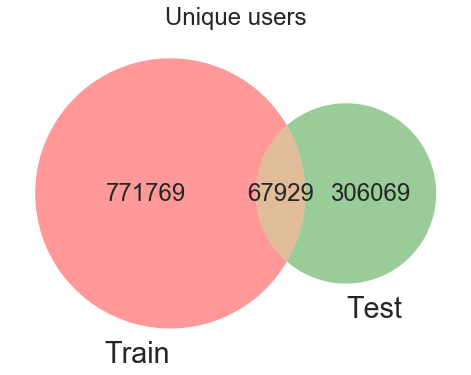

In [20]:
fig = plt.figure(figsize=(15, 6))
plt.title('Unique users')
venn2((771769, 306069, 67929), ['Train', 'Test']);

### region

In [21]:
train_df['region'].describe()

count                1503424
unique                    28
top       Краснодарский край
freq                  141416
Name: region, dtype: object

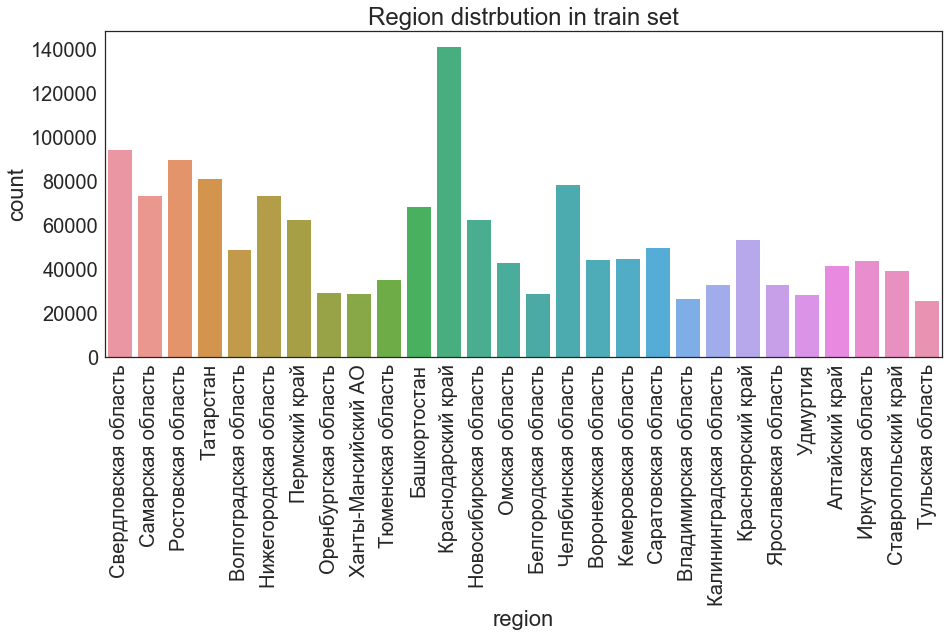

In [22]:
plt.figure(figsize=(15, 6))
plt.title('Region distrbution in train set')
sb.countplot(train_df['region'])
plt.xticks(rotation=90);

In [23]:
test_df['region'].describe()

count                 508438
unique                    28
top       Краснодарский край
freq                   45098
Name: region, dtype: object

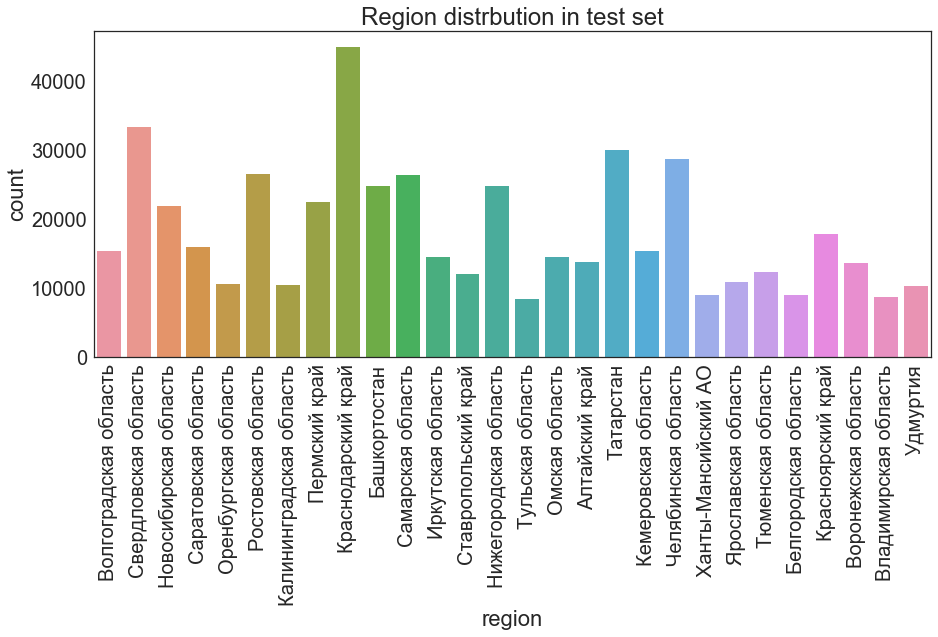

In [24]:
plt.figure(figsize=(15, 6))
plt.title('Region distrbution in test set')
sb.countplot(test_df['region'])
plt.xticks(rotation=90);

In [25]:
joint_df['region'].describe()

count                2011862
unique                    28
top       Краснодарский край
freq                  186514
Name: region, dtype: object

### city

In [26]:
train_df['city'].describe()

count       1503424
unique         1733
top       Краснодар
freq          63638
Name: city, dtype: object

In [27]:
test_df['city'].describe()

count           508438
unique            1644
top       Екатеринбург
freq             22391
Name: city, dtype: object

In [28]:
joint_df['city'].describe()

count          2011862
unique            1752
top       Екатеринбург
freq             85993
Name: city, dtype: object

In [29]:
print('Without interception: ', 1733 + 1644)

Without interception:  3377


In [30]:
print('Interception size: ', 3377 - 1752)

Interception size:  1625


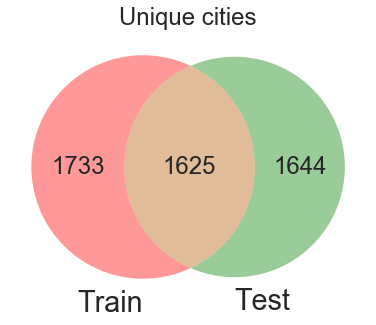

In [31]:
fig = plt.figure(figsize=(15, 5))
plt.title('Unique cities')
venn2((1733, 1644, 1625), ['Train', 'Test']);

### parent_category_name

In [32]:
train_df['parent_category_name'].describe()

count         1503424
unique              9
top       Личные вещи
freq           697623
Name: parent_category_name, dtype: object

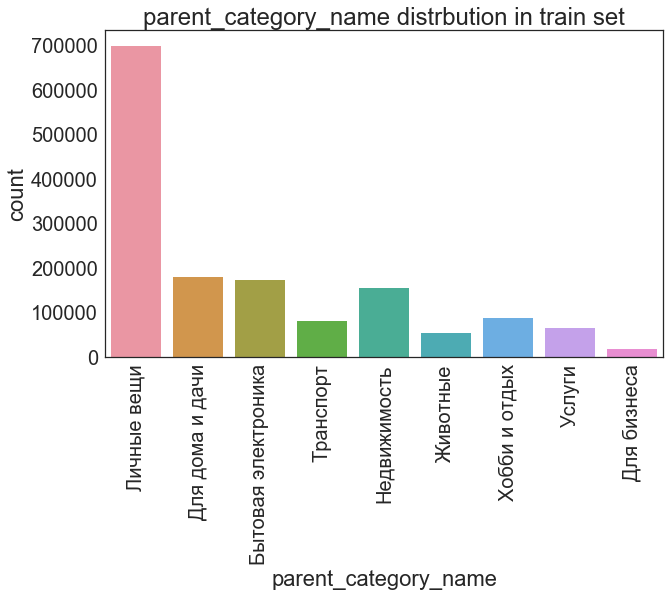

In [33]:
plt.figure(figsize=(10, 6))
plt.title('parent_category_name distrbution in train set')
sb.countplot(train_df['parent_category_name'])
plt.xticks(rotation=90);

In [34]:
test_df['parent_category_name'].describe()

count          508438
unique              9
top       Личные вещи
freq           216577
Name: parent_category_name, dtype: object

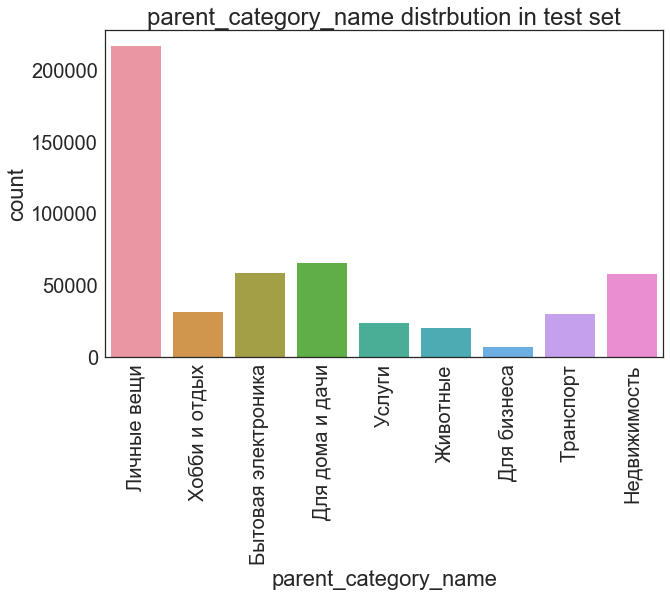

In [35]:
plt.figure(figsize=(10, 6))
plt.title('parent_category_name distrbution in test set')
sb.countplot(test_df['parent_category_name'])
plt.xticks(rotation=90);

In [36]:
joint_df['parent_category_name'].describe()

count         2011862
unique              9
top       Личные вещи
freq           914200
Name: parent_category_name, dtype: object

### category_name

In [37]:
train_df['category_name'].describe()

count                       1503424
unique                           47
top       Одежда, обувь, аксессуары
freq                         282753
Name: category_name, dtype: object

In [38]:
test_df['category_name'].describe()

count                        508438
unique                           47
top       Одежда, обувь, аксессуары
freq                          84896
Name: category_name, dtype: object

In [39]:
joint_df['category_name'].describe()

count                       2011862
unique                           47
top       Одежда, обувь, аксессуары
freq                         367649
Name: category_name, dtype: object

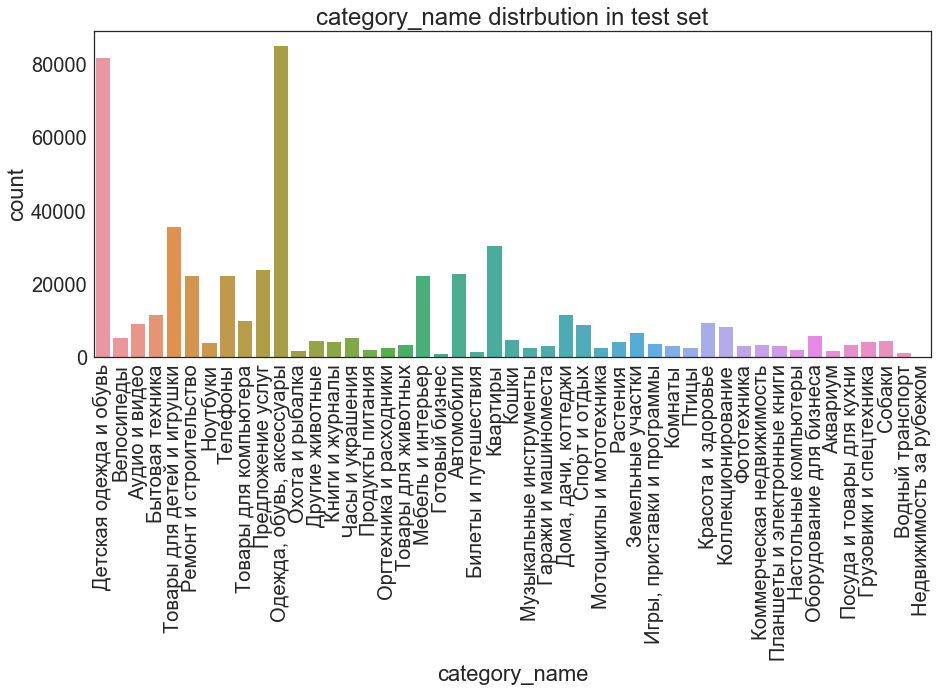

In [40]:
plt.figure(figsize=(15, 6))
plt.title('category_name distrbution in test set')
sb.countplot(test_df['category_name'])
plt.xticks(rotation=90);

In [41]:
from collections import defaultdict

In [42]:
cats = defaultdict(set)

In [43]:
for item in joint_df[['parent_category_name','category_name']].iterrows():
    cats[item[1]['parent_category_name']].add(item[1]['category_name'])

In [44]:
cats

defaultdict(set,
            {'Личные вещи': {'Детская одежда и обувь',
              'Красота и здоровье',
              'Одежда, обувь, аксессуары',
              'Товары для детей и игрушки',
              'Часы и украшения'},
             'Для дома и дачи': {'Бытовая техника',
              'Мебель и интерьер',
              'Посуда и товары для кухни',
              'Продукты питания',
              'Растения',
              'Ремонт и строительство'},
             'Бытовая электроника': {'Аудио и видео',
              'Игры, приставки и программы',
              'Настольные компьютеры',
              'Ноутбуки',
              'Оргтехника и расходники',
              'Планшеты и электронные книги',
              'Телефоны',
              'Товары для компьютера',
              'Фототехника'},
             'Транспорт': {'Автомобили',
              'Водный транспорт',
              'Грузовики и спецтехника',
              'Мотоциклы и мототехника'},
             'Недвижимость': {'Гара

In [45]:
html = "<table>"
for cat, subcats in cats.items():
    html += "<tr>"
    html += "<td><b>{}</b></td>".format(cat)
    html += "<td>"
    for subcat in subcats:
        html += subcat + "<br>"
    html += "</td>"
    html += "</tr>"
html += "</table>"

In [46]:
display(HTML(html))

Личные вещи,"Часы и украшенияДетская одежда и обувьОдежда, обувь, аксессуарыТовары для детей и игрушкиКрасота и здоровье"
Для дома и дачи,Бытовая техникаРемонт и строительствоРастенияМебель и интерьерПосуда и товары для кухниПродукты питания
Бытовая электроника,"НоутбукиНастольные компьютерыТовары для компьютераАудио и видеоПланшеты и электронные книгиОргтехника и расходникиТелефоныИгры, приставки и программыФототехника"
Транспорт,Водный транспортМотоциклы и мототехникаГрузовики и спецтехникаАвтомобили
Недвижимость,"Дома, дачи, коттеджиКвартирыЗемельные участкиКоммерческая недвижимостьКомнатыНедвижимость за рубежомГаражи и машиноместа"
Животные,ПтицыКошкиТовары для животныхДругие животныеСобакиАквариум
Хобби и отдых,Охота и рыбалкаВелосипедыКоллекционированиеБилеты и путешествияКниги и журналыСпорт и отдыхМузыкальные инструменты
Услуги,Предложение услуг
Для бизнеса,Готовый бизнесОборудование для бизнеса


### param_1

In [47]:
train_df['param_1'].describe()

count            1441848
unique               371
top       Женская одежда
freq              226289
Name: param_1, dtype: object

In [48]:
test_df['param_1'].describe()

count             485528
unique               361
top       Женская одежда
freq               66642
Name: param_1, dtype: object

In [49]:
joint_df['param_1'].describe()

count            1927376
unique               371
top       Женская одежда
freq              292931
Name: param_1, dtype: object

In [50]:
joint_df['param_1'].sample(10)

1439531                Продам
126885             С пробегом
273007                    NaN
367021          Для мальчиков
271044      Ювелирные изделия
502994                  Книги
695994          Для мальчиков
974335     Средства для волос
797923                 Модели
949541          Для мальчиков
Name: param_1, dtype: object

In [51]:
cats_p1 = defaultdict(set)

In [52]:
for item in joint_df[['parent_category_name','category_name', 'param_1']].iterrows():
    cats_p1[item[1]['parent_category_name']+'->'+item[1]['category_name']].add(item[1]['param_1'])

In [53]:
html = "<table>"
for cat, params in cats_p1.items():
    html += "<tr>"
    html += "<td><b>{}</b></td>".format(cat)
    html += "<td>"
    for param in params:
        html += str(param) + "<br>"
    html += "</td>"
    html += "</tr>"
html += "</table>"

In [54]:
display(HTML(html))

Личные вещи->Товары для детей и игрушки,nanАвтомобильные креслаПостельные принадлежностиДетские коляскиТовары для кормленияИгрушкиДетская мебельТовары для купанияВелосипеды и самокатыТовары для школы
Для дома и дачи->Мебель и интерьер,"nanДругоеКухонные гарнитурыШкафы и комодыКровати, диваны и креслаОсвещениеПредметы интерьера, искусствоСтолы и стульяКомпьютерные столы и креслаПодставки и тумбыТекстиль и ковры"
Бытовая электроника->Аудио и видео,"nanМузыкальные центры, магнитолыВидеокамерыКабели и адаптерыАксессуарыМузыка и фильмыMP3-плеерыТелевизоры и проекторыНаушникиМикрофоныАкустика, колонки, сабвуферыУсилители и ресиверыВидео, DVD и Blu-ray плееры"
Транспорт->Автомобили,nanНовыеС пробегом
Для дома и дачи->Ремонт и строительство,nanСтройматериалыПотолкиСантехника и саунаОкна и балконыИнструментыДвериКамины и обогревателиСадовая техника
"Личные вещи->Одежда, обувь, аксессуары",Мужская одеждаnanЖенская одеждаАксессуары
Личные вещи->Детская одежда и обувь,nanДля девочекДля мальчиков
Недвижимость->Квартиры,nanКуплюСнимуПродамСдам
Бытовая электроника->Товары для компьютера,АкустикаnanКлавиатуры и мышиТВ-тюнерыСетевое оборудованиеАксессуарыКомплектующиеПереносные жёсткие дискиВеб-камерыДжойстики и рулиФлэшки и карты памятиМониторы
Животные->Собаки,nanПудельИрландский терьерФранцузский бульдогЛабрадорВосточноевропейская овчаркаБишон фризеШелтиПти брабансонСтаффордширский терьерВест хайленд вайт терьерДалматинБельгийский гриффонБоксерШи-тцуФокстерьерБурбульРотвейлерБультерьерКокер спаниельКерн терьерКоллиЦвергшнауцерБигльСибирский хаскиКитайская хохлатаяКане КорсоРусская борзаяАмериканский бульдогБриарБельгийская овчаркаСенбернарМиттельшнауцерЦвергпинчерАнглийский бульдогБульмастифБобтейлЛайкаПойнтерМастифБассетРетриверЛевреткаДогДоберманВельштерьерРодезийский риджбекСеттерПапийонЙоркширский терьерНьюфаундлендЯгдтерьерЛхаса АпсоПитбульЧихуахуаТаксаКавказская овчаркаСреднеазиатская овчаркаКурцхаарЧау-чауЛеонбергерФранцузская овчаркаНорвич терьерПекинесСкотч-терьерТой-терьерМопсАкитаБернский зенненхундТой-пудельШпицОвчаркаДжек Рассел терьерДругаяБиверБрюссельский гриффонШарпейАляскинский маламутЯпонский хинНемецкая овчаркаШвейцарская овчаркаСамоедская лайкаМосковская сторожеваяСпаниельБолонкиБасенджиРизеншнауцерЭрдельтерьер
"Недвижимость->Дома, дачи, коттеджи",nanКуплюСнимуПродамСдам


### param_2

In [55]:
train_df['param_2'].describe()

count     848882
unique       271
top        Обувь
freq      150450
Name: param_2, dtype: object

In [56]:
test_df['param_2'].describe()

count     275209
unique       255
top        Обувь
freq       48776
Name: param_2, dtype: object

In [57]:
joint_df['param_2'].describe()

count     1124091
unique        277
top         Обувь
freq       199226
Name: param_2, dtype: object

In [58]:
joint_df['param_2'].sample(10)

1040501                  NaN
18069                    NaN
1433287                  NaN
718207                   NaN
459833                   NaN
1438911                  NaN
303364                   NaN
959597                   NaN
111819     Пиджаки и костюмы
236472           Iran Khodro
Name: param_2, dtype: object

In [59]:
cats_p2 = defaultdict(set)

In [60]:
for item in joint_df[['parent_category_name','category_name', 'param_2']].iterrows():
    cats_p2[item[1]['parent_category_name']+'->'+item[1]['category_name']].add(item[1]['param_2'])

In [61]:
html = "<table>"
for cat, params in cats_p2.items():
    html += "<tr>"
    html += "<td><b>{}</b></td>".format(cat)
    html += "<td>"
    for param in params:
        html += str(param) + "<br>"
    html += "</td>"
    html += "</tr>"
html += "</table>"

In [62]:
display(HTML(html))

Личные вещи->Товары для детей и игрушки,nan
Для дома и дачи->Мебель и интерьер,nan
Бытовая электроника->Аудио и видео,nan
Транспорт->Автомобили,nanJaguarSmartЛуАЗВАЗ (LADA)МосквичCadillacFordToyotaChevroletMazdaBentleyBMWSaabСМЗIran KhodroGMCJACLanciaSubaruDatsunTataBuickACFIATChangFengAudiHyundaiAlpinaHummerCheryRoverRavonЗАЗMINIVortexBrillianceТагАЗDaciaKIABAWPorscheLincolnAlfa RomeoTrabantHaimaFAWГАЗZXAcuraPontiacPlymouthJeepУАЗNissanLDVHavalDaihatsuHondaShuanghuanTianyeDaewooOpelHawtaiLuxgenSsangYongLandwindЗИЛAsiaSMAMercedes-BenzSEATHuanghaiProtonChryslerSuzukiIvecoPeugeotDodgeSkodaGeelyRenaultScionCitroenTalbotGACLIFANWartburgVolvoИЖLand RoverGenesisMaybachLexusВИСGreat WallZOTYEJMCДругаяMitsubishiRolls-RoyceDoninvestDerwaysРАФIsuzuInfinitiDongfengVolkswagenMaseratiChanganFotonHafeiSaturnBYD
Для дома и дачи->Ремонт и строительство,nan
"Личные вещи->Одежда, обувь, аксессуары",nanДругоеНижнее бельёВерхняя одеждаДжинсыРубашкиКупальникиСвадебные платьяБрюкиПиджаки и костюмыОбувьТрикотаж и футболкиРубашки и блузкиТопы и футболкиПлатья и юбкиТрикотаж
Личные вещи->Детская одежда и обувь,"nanДругоеШапки, варежки, шарфыВерхняя одеждаПижамыБрюкиОбувьТрикотажПлатья и юбкиКомбинезоны и боди"
Недвижимость->Квартиры,2nanСтудия9735ПосуточноНа длительный срок46> 918
Бытовая электроника->Товары для компьютера,"nanОперативная памятьКорпусыМатеринские платыЗвуковые картыКонтроллерыВидеокартыБлоки питанияПроцессорыЖёсткие дискиCD, DVD и Blu-ray приводыСистемы охлаждения"
Животные->Собаки,nan
"Недвижимость->Дома, дачи, коттеджи",nanТаунхаусДачаДомКоттедж


### param_3

In [63]:
train_df['param_3'].describe()

count       640859
unique        1219
top       Вторичка
freq         50615
Name: param_3, dtype: object

In [64]:
test_df['param_3'].describe()

count       202107
unique         973
top       Вторичка
freq         18307
Name: param_3, dtype: object

In [65]:
joint_df['param_3'].describe()

count       842966
unique        1276
top       Вторичка
freq         68922
Name: param_3, dtype: object

In [66]:
joint_df['param_3'].sample(10)

533827     86-92 см (1-2 года)
120127                      37
1188509                    NaN
1029849                    NaN
92190                      NaN
420679     86-92 см (1-2 года)
1312547    74-80 см (7-12 мес)
1385424                    NaN
867636                     NaN
1376778                    NaN
Name: param_3, dtype: object

In [67]:
cats_p3 = defaultdict(set)

In [68]:
for item in joint_df[['parent_category_name','category_name', 'param_3']].iterrows():
    cats_p3[item[1]['parent_category_name']+'->'+item[1]['category_name']].add(item[1]['param_3'])

In [69]:
html = "<table>"
for cat, params in cats_p3.items():
    html += "<tr>"
    html += "<td><b>{}</b></td>".format(cat)
    html += "<td>"
    for param in params:
        html += str(param) + "<br>"
    html += "</td>"
    html += "</tr>"
html += "</table>"

In [70]:
display(HTML(html))

### title

In [71]:
train_df['title'].describe()

count     1503424
unique     788377
top        Платье
freq        15550
Name: title, dtype: object

In [72]:
test_df['title'].describe()

count     508438
unique    298039
top       Платье
freq        4673
Name: title, dtype: object

In [73]:
joint_df['title'].describe()

count     2011862
unique    1022203
top        Платье
freq        20223
Name: title, dtype: object

In [74]:
from itertools import chain

In [75]:
from nltk import bigrams, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter

In [76]:
stop_en = stopwords.words('english')
stop_ru = stopwords.words('russian')
stop = set(stop_en + stop_ru)
stop |= set([
    'м', 'эт', 'м²', 'сот', 'р', 'в', 'т', 'д',
])

In [77]:
def get_tokens(text, lower=True):
    tokenizer = RegexpTokenizer(r'[0-9]*[^\W\d]+[0-9]*')
    tokens = tokenizer.tokenize(text)
    if lower:
        return [token.lower() for token in tokens if not token.lower() in stop]
    else:
        return [token for token in tokens if not token in stop]

In [78]:

title_bi = chain.from_iterable([list(bigrams(get_tokens(title))) for title in joint_df['title'].values])

In [79]:
title_bicount = Counter(title_bi)

In [80]:
title_bicount.most_common(20)

[(('дом', 'участке'), 24965),
 (('участок', 'ижс'), 14599),
 (('весна', 'осень'), 12543),
 (('дача', 'участке'), 7998),
 (('снт', 'днп'), 6794),
 (('iphone', '5s'), 6664),
 (('samsung', 'galaxy'), 6040),
 (('участок', 'снт'), 5963),
 (('сниму', 'квартиру'), 5340),
 (('свадебное', 'платье'), 5168),
 (('ваз', 'samara'), 4561),
 (('добрые', 'руки'), 3603),
 (('отличном', 'состоянии'), 3481),
 (('куплю', 'квартиру'), 3326),
 (('стиральная', 'машина'), 3314),
 (('куртка', 'весна'), 3083),
 (('резиновые', 'сапоги'), 3082),
 (('спортивный', 'костюм'), 3029),
 (('iphone', '4s'), 2911),
 (('осень', 'весна'), 2865)]

In [81]:
del title_bi, title_bicount

### description

In [82]:
train_df['description'].describe()

count                 1387148
unique                1317102
top       В хорошем состоянии
freq                     2249
Name: description, dtype: object

In [83]:
test_df['description'].describe()

count                  508438
unique                 485209
top       В хорошем состоянии
freq                      918
Name: description, dtype: object

In [84]:
joint_df['description'].describe()

count                 1895586
unique                1793972
top       В хорошем состоянии
freq                     3167
Name: description, dtype: object

In [85]:
descr_bi = chain.from_iterable([list(bigrams(get_tokens(str(descr)))) for descr in joint_df['description'].values])

In [86]:
descr_bicount = Counter(descr_bi)

In [87]:
descr_bicount.most_common(20)

[(('хорошем', 'состоянии'), 144144),
 (('отличном', 'состоянии'), 132749),
 (('состояние', 'отличное'), 44606),
 (('идеальном', 'состоянии'), 42054),
 (('состояние', 'хорошее'), 41337),
 (('торг', 'уместен'), 24423),
 (('вопросы', 'телефону'), 22600),
 (('шаговой', 'доступности'), 21390),
 (('натуральная', 'кожа'), 19948),
 (('возможен', 'торг'), 19574),
 (('рабочем', 'состоянии'), 18849),
 (('состояние', 'идеальное'), 17525),
 (('wi', 'fi'), 16591),
 (('отличное', 'состояние'), 15663),
 (('цена', 'руб'), 15298),
 (('полный', 'комплект'), 14183),
 (('вес', 'кг'), 13955),
 (('цена', 'договорная'), 13499),
 (('весна', 'осень'), 13150),
 (('длительный', 'срок'), 13007)]

In [88]:
del descr_bi, descr_bicount

### price

In [89]:
import matplotlib.ticker as plticker

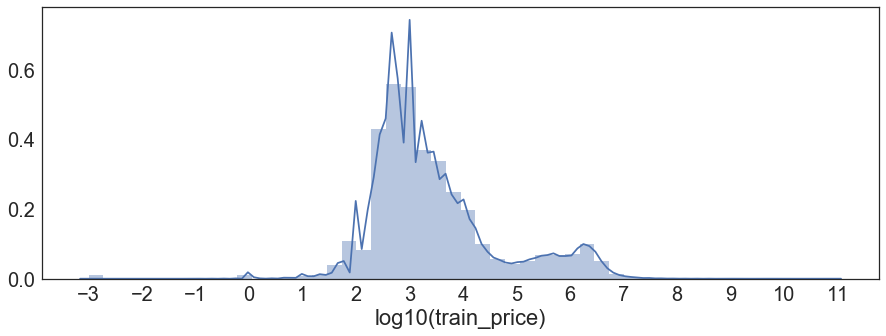

In [90]:
plt.figure(figsize=(15, 5))
ax = sb.distplot(np.log10(train_df['price'].dropna()+0.001))
loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)
#plt.xticks(rotation=90);
plt.xlabel('log10(train_price)')

In [91]:
train_df['price'].describe()

count    1.418062e+06
mean     3.167081e+05
std      6.689154e+07
min      0.000000e+00
25%      5.000000e+02
50%      1.300000e+03
75%      7.000000e+03
max      7.950101e+10
Name: price, dtype: float64

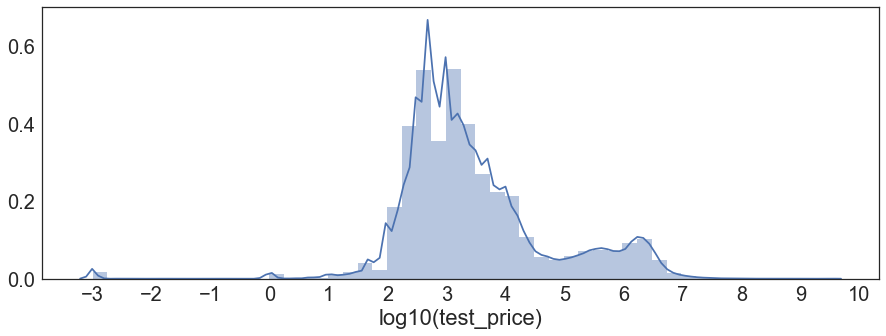

In [93]:
plt.figure(figsize=(15, 5))
ax = sb.distplot(np.log10(test_df['price'].dropna()+0.001))
loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)
#plt.xticks(rotation=90);
plt.xlabel('log10(test_price)')

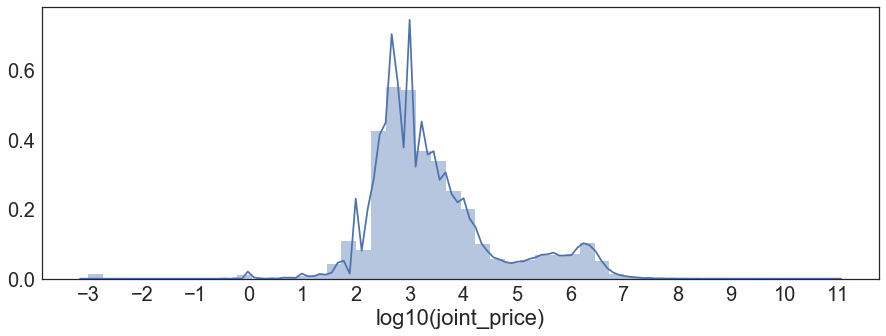

In [92]:
plt.figure(figsize=(15, 5))
ax = sb.distplot(np.log10(joint_df['price'].dropna()+0.001))
loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)
#plt.xticks(rotation=90);
plt.xlabel('log10(joint_price)')

### item_seq_number

In [96]:
train_df['item_seq_number'].describe()

count    1.503424e+06
mean     7.436740e+02
std      5.572522e+03
min      1.000000e+00
25%      9.000000e+00
50%      2.900000e+01
75%      8.800000e+01
max      2.044290e+05
Name: item_seq_number, dtype: float64

In [100]:
len(train_df['item_seq_number'].unique())

28232

In [98]:
test_df['item_seq_number'].describe()

count    508438.000000
mean        825.132150
std        5646.868618
min           1.000000
25%           8.000000
50%          30.000000
75%          94.000000
max      205064.000000
Name: item_seq_number, dtype: float64

In [103]:
len(test_df['item_seq_number'].unique())

15890

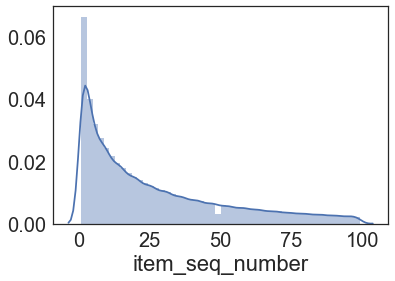

In [113]:
sb.distplot(joint_df.loc[joint_df['item_seq_number'] < 100, 'item_seq_number'])

### activation_date

In [134]:
train_df['activation_date'] = pd.to_datetime(train_df['activation_date'])
train_df['activation_date'].describe()

count                 1503424
unique                     21
top       2017-03-20 00:00:00
freq                   115190
first     2017-03-15 00:00:00
last      2017-04-07 00:00:00
Name: activation_date, dtype: object

In [136]:
test_df['activation_date'] = pd.to_datetime(test_df['activation_date'])
test_df['activation_date'].describe()

count                  508438
unique                      9
top       2017-04-12 00:00:00
freq                    81824
first     2017-04-12 00:00:00
last      2017-04-20 00:00:00
Name: activation_date, dtype: object

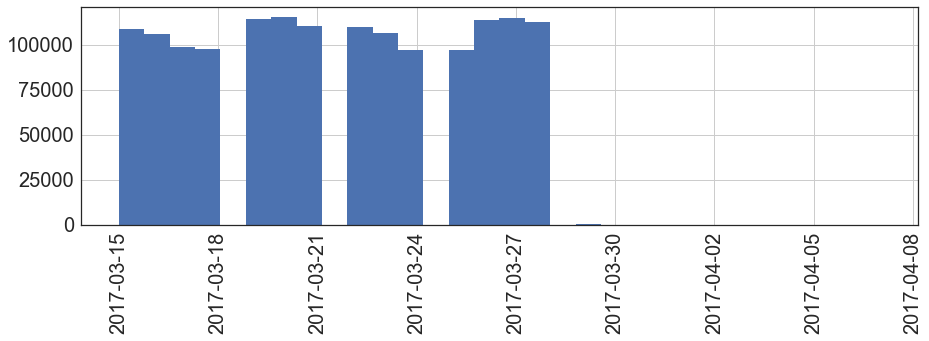

In [129]:
plt.figure(figsize=(15, 4))
train_df['activation_date'].hist(bins=30)
plt.xticks(rotation=90);

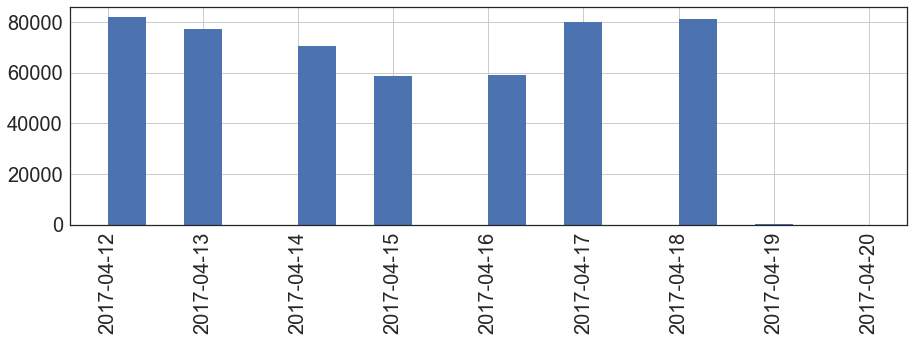

In [132]:
plt.figure(figsize=(15, 4))
test_df['activation_date'].hist(bins=20)
plt.xticks(rotation=90);

### user_type

In [137]:
train_df['user_type'].describe()

count     1503424
unique          3
top       Private
freq      1075706
Name: user_type, dtype: object

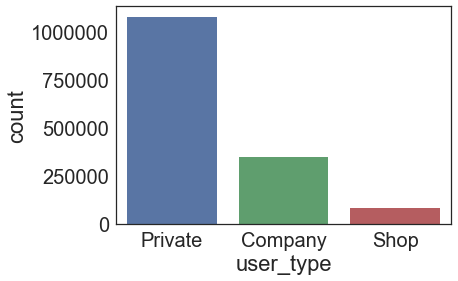

In [142]:
sb.countplot(train_df['user_type'])

In [138]:
test_df['user_type'].describe()

count      508438
unique          3
top       Private
freq       358259
Name: user_type, dtype: object

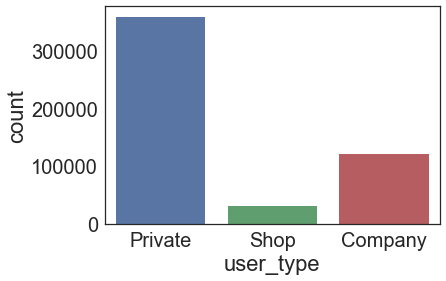

In [143]:
sb.countplot(test_df['user_type'])

In [139]:
joint_df['user_type'].describe()

count     2011862
unique          3
top       Private
freq      1433965
Name: user_type, dtype: object

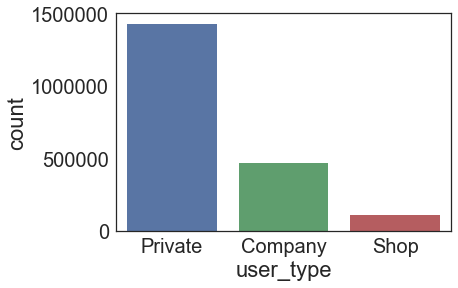

In [141]:
sb.countplot(joint_df['user_type'])

### image

In [144]:
train_df['image'].describe()

count                                               1390836
unique                                              1390836
top       6d9ba8208cb77b8df80f8ca1116b713ffe8cd799877812...
freq                                                      1
Name: image, dtype: object

In [146]:
sum(train_df['image'].isnull())

112588

In [ ]:
test_df['image'].describe()

In [147]:
sum(test_df['image'].isnull())

42609

### image_top_1

In [149]:
train_df['image_top_1'].describe()

count    1.390836e+06
mean     1.241932e+03
std      9.704641e+02
min      0.000000e+00
25%      4.250000e+02
50%      1.057000e+03
75%      2.217000e+03
max      3.066000e+03
Name: image_top_1, dtype: float64

In [150]:
len(train_df['image_top_1'].unique())

3063

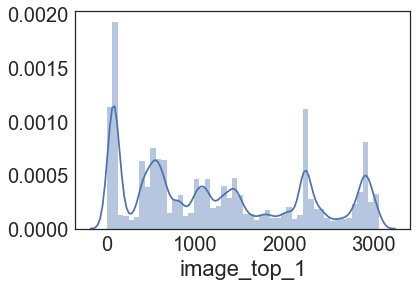

In [153]:
sb.distplot(train_df['image_top_1'].dropna())

### deal_probability

In [155]:
train_df['deal_probability'].describe()

count    1.503424e+06
mean     1.391306e-01
std      2.600785e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.508700e-01
max      1.000000e+00
Name: deal_probability, dtype: float64

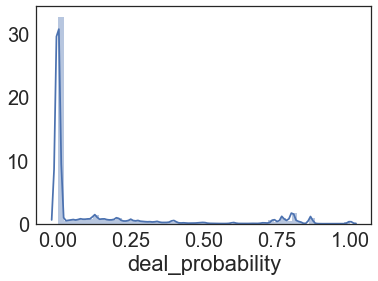

In [156]:
sb.distplot(train_df['deal_probability'])

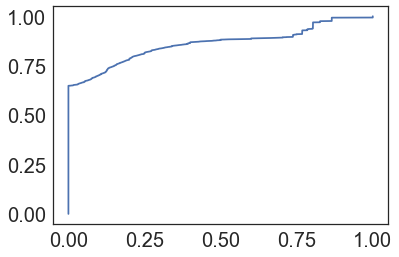

In [157]:
plt.plot(np.sort(train_df['deal_probability']), np.linspace(0, 1, len(train_df['deal_probability']), endpoint=False))

In [158]:
del train_df, test_df, joint_df